
# Heart Disease Prediction using Neural Networks

> In this project, we build a neural network model to predict the presence of heart disease in patients using the Cleveland Heart Disease dataset. The dataset contains 303 records with various medical attributes such as age, sex, blood pressure, cholesterol level, maximum heart rate, and more.


The goal of this project is to classify whether a patient is likely to have heart disease (1) or not (0), using machine learning techniques, specifically a neural network built with Keras and TensorFlow.

This notebook demonstrates the full machine learning workflow:


*   Loading and exploring the data using pandas and matplotlib
*   Preprocessing and encoding features
*   Splitting data into training and test sets
*   Building and training a simple Sequential neural network model
*   Evaluating the model and displaying predictions vs. actual results
We also analyze the model's performance and provide predictions to better understand its accuracy and limitations.

This project gives you hands-on experience in applying AI techniques to real-world healthcare data, highlighting the power of machine learning in early diagnosis and medical decision support.

# Table of Contents
1.[Importing Libraries and Loading the Dataset](https://colab.research.google.com/drive/1BySc4VRUWLK_L4YzalvBoXseyOPxE1AI#scrollTo=XzRpSAIWumyj&line=2&uniqifier=1)

2.[Exploring and Cleaning the Data](https://colab.research.google.com/drive/1BySc4VRUWLK_L4YzalvBoXseyOPxE1AI#scrollTo=-w7mlWpDvmAY&line=1&uniqifier=1)

3.[ Preparing the Data for the Model](https://colab.research.google.com/drive/1BySc4VRUWLK_L4YzalvBoXseyOPxE1AI#scrollTo=8S_xI32qwmy1&line=11&uniqifier=1)

4.[Building and Training the Neural Network](https://colab.research.google.com/drive/1BySc4VRUWLK_L4YzalvBoXseyOPxE1AI#scrollTo=Qt_e9urrxYQC&line=3&uniqifier=1)

5.[ Evaluating the Model and Analyzing Results](https://colab.research.google.com/drive/1BySc4VRUWLK_L4YzalvBoXseyOPxE1AI#scrollTo=FrFZkD20yrwg&line=1&uniqifier=1)

6.[Making Predictions and Testing the Model](https://colab.research.google.com/drive/1BySc4VRUWLK_L4YzalvBoXseyOPxE1AI#scrollTo=rrN8IDMOyyBX&line=2&uniqifier=1)


<a class="anchor" id="1."></a>
# 1. Importing the Dataset

We will load the heart disease dataset using pandas and numpy, which will help us handle the tabular data efficiently.


In [12]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.8.0


<a class="anchor" id="2."></a>
# 2. Exploring and Preparing the Data

Let’s take a look at the dataset structure, data types, and basic statistics to understand what we’re working with.


In [2]:
# تحميل الداتا من GitHub
url = 'https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv'
df = pd.read_csv(url)

# عرض أول 5 صفوف
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# حجم البيانات
print("شكل البيانات:", df.shape)

# معلومات عن الأعمدة
df.info()

# إحصائيات عامة
df.describe()

# هل في بيانات ناقصة؟
df.isnull().sum()


شكل البيانات: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<a class="anchor" id="3."></a>
# 3. Creating Training and Testing Datasets

We separate the dataset into features (X) and target (y), and split them into training and test sets.


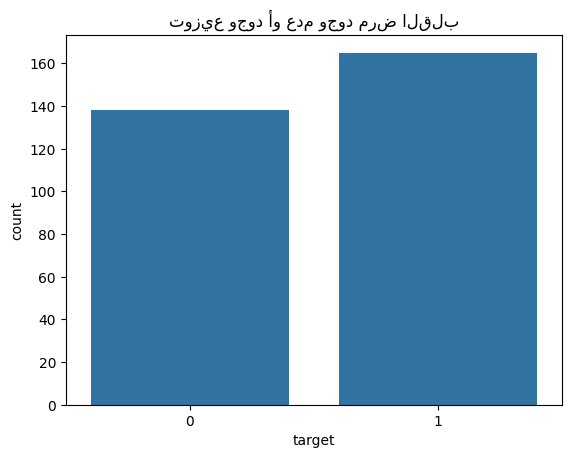

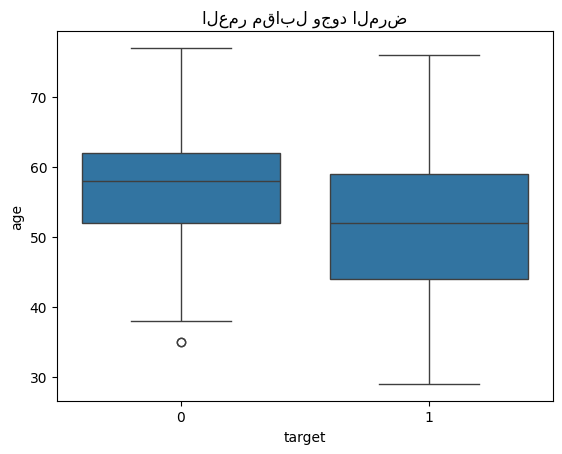

In [8]:
# توزيع المرض
sns.countplot(x='target', data=df)
plt.title('توزيع وجود أو عدم وجود مرض القلب')
plt.show()

# علاقات الأعمار بالمرض
sns.boxplot(x='target', y='age', data=df)
plt.title('العمر مقابل وجود المرض')
plt.show()


In [16]:
# الميزات
X = df.drop('target', axis=1)

# الهدف
y = df['target']

# تقسيم البيانات لتدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<a class="anchor" id="4."></a>
# 4. Building and Compiling the Neural Network

We create a simple neural network using Keras with 2 hidden layers to perform binary classification.


In [27]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # أول طبقة Input
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training the Model

We train the neural network using the training data for 100 epochs and monitor the progress.


In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5837 - loss: 0.7186 - val_accuracy: 0.7551 - val_loss: 0.6247
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6167 - loss: 0.6701 - val_accuracy: 0.7755 - val_loss: 0.5839
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6555 - loss: 0.6360 - val_accuracy: 0.8163 - val_loss: 0.5507
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7613 - loss: 0.5755 - val_accuracy: 0.8163 - val_loss: 0.5248
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7602 - loss: 0.5461 - val_accuracy: 0.8163 - val_loss: 0.5028
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7553 - loss: 0.5597 - val_accuracy: 0.8571 - val_loss: 0.4804
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7874 - loss: 0.5294 - val_accuracy: 0.8776 - val_loss: 0.4586
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7465 - loss: 0.5374 - val_accuracy: 0.87

<a class="anchor" id="5."></a>
# 5. Results and Evaluation

We evaluate the trained model on the test set and check its accuracy.


In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"دقة النموذج على بيانات الاختبار: {accuracy*100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8064 - loss: 0.7525
دقة النموذج على بيانات الاختبار: 80.33%


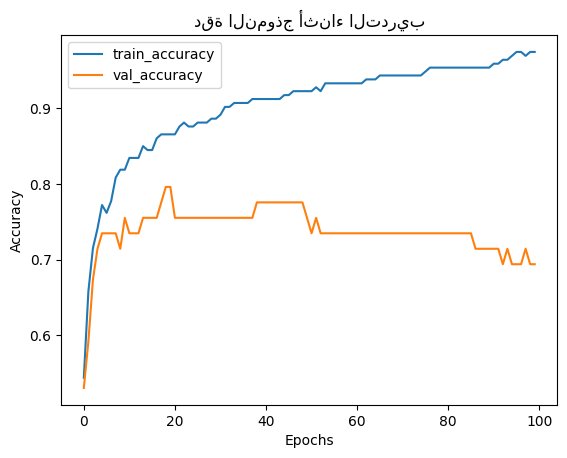

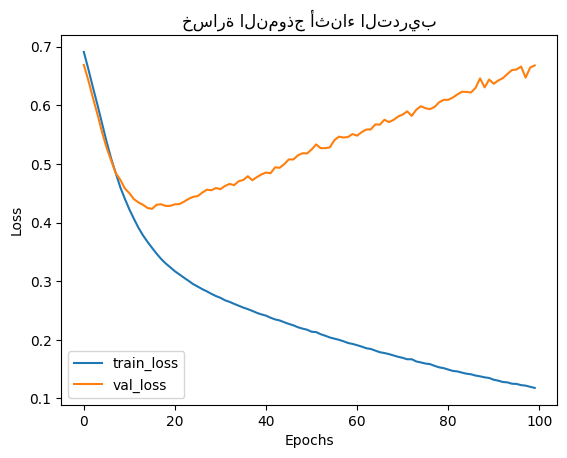

In [24]:
# منحنى الدقة
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('دقة النموذج أثناء التدريب')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# منحنى الخسارة
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('خسارة النموذج أثناء التدريب')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Making Predictions

Let’s use the trained model to predict heart disease for test data and compare it with actual labels.


In [25]:
# تجربة على أول 5 بيانات من الاختبار
preds = model.predict(X_test[:5])
print("توقعات النموذج:", np.round(preds.ravel()))
print("القيم الحقيقية:", y_test[:5].values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
توقعات النموذج: [0. 1. 1. 0. 1.]
القيم الحقيقية: [0 0 1 0 1]
